In [3]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

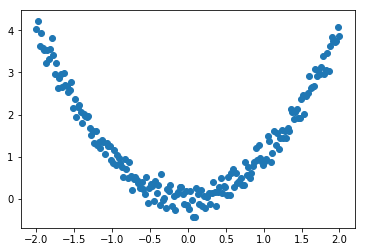

In [4]:
x_data = np.linspace(-2,2,200)[:,np.newaxis]
noise = np.random.normal(0,0.2,x_data.shape)
y_data = np.square(x_data) + noise

plt.scatter(x_data,y_data)
plt.show()

In [5]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

In [6]:
# 把numpy数据变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [7]:
# 构建神经网络模型
# 一般把网络中具有可学习参数的层放在__init__()中
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        # 初始化nn.Module
        super(LinearRegression, self).__init__()
        # 1-10-1
        self.fc1 = nn.Linear(1,10)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(10,1)
        
    # 定义网络计算
    def forward(self,x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        return x

In [8]:
# 定义模型
model = LinearRegression()
# 定义代价函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.3)

In [9]:
for name, parameters in model.named_parameters():
    print('name:{}, param:{}'.format(name,parameters))

name:fc1.weight, param:Parameter containing:
tensor([[-0.4924],
        [-0.0447],
        [-0.6251],
        [-0.8126],
        [ 0.7010],
        [ 0.6066],
        [-0.2263],
        [ 0.6366],
        [ 0.1443],
        [ 0.0964]], requires_grad=True)
name:fc1.bias, param:Parameter containing:
tensor([ 0.6482, -0.3389, -0.6790, -0.8804,  0.3595, -0.8138, -0.6144,  0.1792,
        -0.2765,  0.7041], requires_grad=True)
name:fc2.weight, param:Parameter containing:
tensor([[ 0.2670,  0.1702, -0.1610,  0.2911,  0.0045,  0.3037,  0.2164,  0.2546,
          0.2610, -0.0485]], requires_grad=True)
name:fc2.bias, param:Parameter containing:
tensor([-0.1872], requires_grad=True)


In [10]:
for i in range(2001):
    out = model(inputs)
    # 计算loss
    loss = mse_loss(out, target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200 == 0:
        print(i,loss.item())

0 4.995528221130371
200 1.3871753215789795
400 0.08333580195903778
600 0.0967964380979538
800 0.0991976410150528
1000 0.09215280413627625
1200 0.07753288745880127
1400 0.06612622737884521
1600 0.06039357930421829
1800 0.057655587792396545
2000 0.056189510971307755


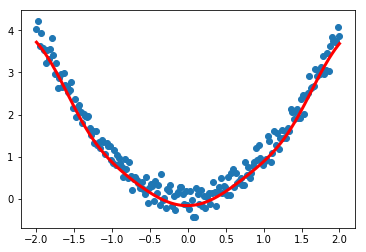

In [11]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()